In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import sklearn.metrics
from sklearn.metrics import confusion_matrix, accuracy_score, r2_score
from sklearn.model_selection import train_test_split

In [2]:
#version 3
def statsmodels_train_test_split(df, stratify=None, **kwargs):

    if stratify is None:
        y, X = df.iloc[:,0], df.drop(columns=df.columns[0])
        X_train, X_test, y_train, y_test = train_test_split(X,y, **kwargs)
    else:
        y, X = stratify, df.drop(columns = stratify.name)
        X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y, **kwargs)
    
    return pd.concat([X_train, y_train], axis=1), pd.concat([X_test, y_test], axis=1)

In [3]:
sns.get_dataset_names()

/Users/seanreed1/miniconda3/lib/python3.7/site-packages/seaborn/utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file /Users/seanreed1/miniconda3/lib/python3.7/site-packages/seaborn/utils.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [4]:
raw = sns.load_dataset('tips')
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [5]:
raw.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


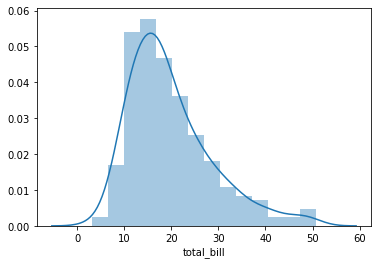

In [6]:
sns.distplot(raw['total_bill'])

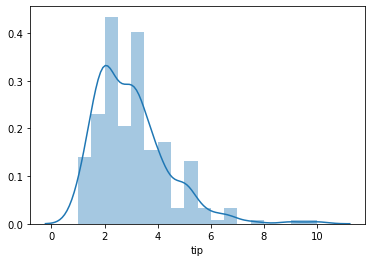

In [7]:
sns.distplot(raw['tip'])

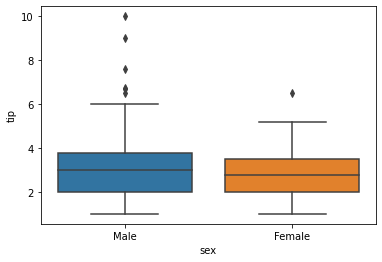

In [8]:
sns.boxplot('sex', 'tip', data=raw)

In [9]:
raw['day'].value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [10]:
raw['time'].value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [11]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [12]:
formula = 'total_bill ~ tip + C(sex) +C(smoker) + C(day) + C(time) + size'

In [13]:
train, test = statsmodels_train_test_split(raw)

In [14]:
model = smf.ols(formula = formula, data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             total_bill   R-squared:                       0.599
Model:                            OLS   Adj. R-squared:                  0.581
Method:                 Least Squares   F-statistic:                     32.53
Date:                Fri, 11 Sep 2020   Prob (F-statistic):           7.21e-31
Time:                        12:21:15   Log-Likelihood:                -573.71
No. Observations:                 183   AIC:                             1165.
Df Residuals:                     174   BIC:                             1194.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             3.8551      1.623      2.375      0.019       0.651       7.059
C(sex)[T.Female]     -1.3538      0.936     -1.446      0.150      -3.202       0.494
C(smoker)[T.No]      -3.3200      0.941     -3.527      0.001      -5.178      -1.462
C(day)[T.Fri]        -3.5469      2.755     -1.287      0.200      -8.984       1.891
C(day)[T.Sat]        -3.8023      3.109     -1.223      0.223      -9.939       2.335
C(day)[T.Sun]        -3.5336      3.126     -1.130      0.260      -9.704       2.637
C(time)[T.Dinner]     4.6062      2.967      1.552      0.122      -1.250      10.462
tip                   3.2508      0.361      9.004      0.000       2.538       3.963
size                  3.2851      0.534      6.157      0.000       2.232       4.338
==============================================================================
Omnibus:                       27.222   Durbin-Watson:                   2.213
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               38.760
Skew:                           0.858   Prob(JB):                     3.83e-09
Kurtosis:                       4.462   Cond. No.                         58.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
raw.head(30)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [16]:
test.head()

,tip,sex,smoker,day,time,size,total_bill
178,4.00,Female,Yes,Sun,Dinner,2,9.60
216,3.00,Male,Yes,Sat,Dinner,5,28.15
133,2.00,Female,No,Thur,Lunch,2,12.26
198,2.00,Female,Yes,Thur,Lunch,2,13.00
85,5.17,Female,No,Thur,Lunch,4,34.83


In [17]:
y_pred_test = model.predict(test)
y_pred_test

178    23.147413
216    30.837136
133    12.253145
198    15.573180
85     29.128405
         ...    
185    34.287366
144    13.228380
99     13.040878
18     21.487125
142    33.214699
Length: 61, dtype: float64

In [18]:
r2_score(test['total_bill'], y_pred_test)

0.5145640347411012

In [19]:
# Logistic Regression

In [20]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.3 KB


In [21]:
raw.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder().fit_transform(raw['time'])
le

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

In [23]:
raw.loc[:, "time_code"] = le
raw.head()

,total_bill,tip,sex,smoker,day,time,size,time_code
0,16.99,1.01,Female,No,Sun,Dinner,2,0
1,10.34,1.66,Male,No,Sun,Dinner,3,0
2,21.01,3.50,Male,No,Sun,Dinner,3,0
3,23.68,3.31,Male,No,Sun,Dinner,2,0
4,24.59,3.61,Female,No,Sun,Dinner,4,0


In [24]:
train2, test2 = statsmodels_train_test_split(raw)

In [25]:
formula2 = 'time_code ~ total_bill + tip + C(sex) + C(smoker) + size'

In [26]:
model2 = smf.logit(formula = formula2, data=train2).fit()
model2.summary()

Optimization terminated successfully.
         Current function value: 0.569914
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              time_code   No. Observations:                  183
Model:                          Logit   Df Residuals:                      177
Method:                           MLE   Df Model:                            5
Date:                Fri, 11 Sep 2020   Pseudo R-squ.:                 0.06774
Time:                        12:21:15   Log-Likelihood:                -104.29
converged:                       True   LL-Null:                       -111.87
Covariance Type:            nonrobust   LLR p-value:                  0.009713
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.1774      0.616     -0.288      0.773      -1.385       1.031
C(sex)[T.Female]     0.9421      0.342      2.756      0.006       0.272       1.612
C(smoker)[T.No]      0.1324      0.354      0.374      0.708      -0.561       0.826
total_bill          -0.0231      0.032     -0.727      0.467      -0.085       0.039
tip                 -0.0864      0.194     -0.446      0.656      -0.466       0.293
size                -0.1790      0.262     -0.682      0.495      -0.693       0.335
====================================================================================
"""

In [27]:
y_pred_test = model2.predict(test2)
y_pred_test

102    0.266558
200    0.183547
158    0.501026
151    0.293321
233    0.314541
         ...   
143    0.225452
3      0.225079
113    0.235613
155    0.243801
50     0.287230
Length: 61, dtype: float64

In [28]:
predictions = np.round(y_pred_test)

In [29]:
confusion_matrix(test2['time_code'], predictions)

array([[44,  4],
       [12,  1]])

In [30]:
TP = 4
TN = 36
FP = 10
FN = 11

## By definition in sklearn, 
## confusion matrix C[i, j]  is equal to the  of obs *known* to be in group i
## and *predicted* by the model to be in group j.

In [36]:
# FALSE POSITIVE = 3 and FALSE NEGATIVE = 4
model_prediction = [1,1,1,0,0,0,0]
actual =           [0,0,0,1,1,1,1]

In [33]:
confusion_matrix(actual,model_prediction)

array([[0, 3],
       [4, 0]])

In [37]:
# TRUE POSITIVE = 5 and TRUE NEGATIVE = 2
model_prediction = [1,1,1,1,1,0,0]
actual =           [1,1,1,1,1,0,0]
confusion_matrix(actual,model_prediction)

array([[2, 0],
       [0, 5]])

In [38]:
confusion_matrix??

Signature:
confusion_matrix(
    y_true,
    y_pred,
    *,
    labels=None,
    sample_weight=None,
    normalize=None,
)
Source:   
@_deprecate_positional_args
def confusion_matrix(y_true, y_pred, *, labels=None, sample_weight=None,
                     normalize=None):
    """Compute confusion matrix to evaluate the accuracy of a classification.

    By definition a confusion matrix :math:`C` is such that :math:`C_{i, j}`
    is equal to the number of observations known to be in group :math:`i` and
    predicted to be in group :math:`j`.

    Thus in binary classification, the count of true negatives is
    :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`, true positives is
    :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

    Read more in the :ref:`User Guide <confusion_matrix>`.

    Parameters
    ----------
    y_true : array-like of shape (n_samples,)
        Ground truth (correct) target values.

    y_pred : array-like of shape (n_samples,)
        Estimated tar